In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


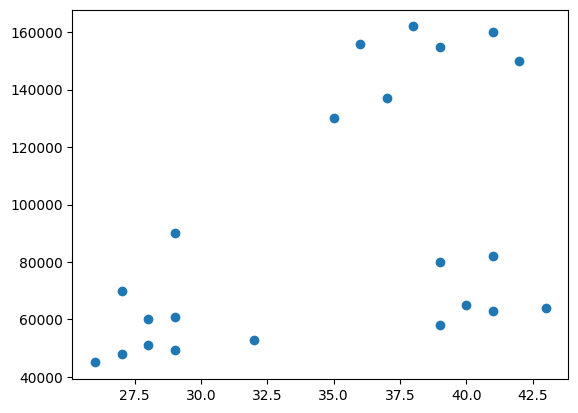

In [5]:
plt.scatter(df['Age'], df['Income($)'])

In [7]:
km = KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df.drop(['Name'], axis=1))
y_predicted

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [13]:
df0 = df[df['cluster'] == 0]
df0.head()

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


In [14]:
df1 = df[df['cluster'] == 1]
df1.head()

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1


In [15]:
df2 = df[df['cluster'] == 2]
df2.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


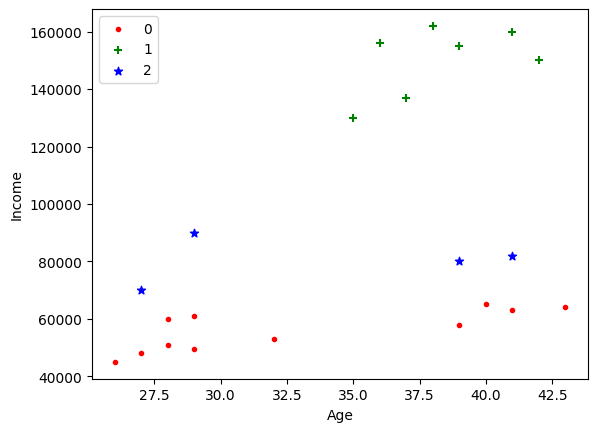

In [20]:
plt.scatter(df0['Age'],df0['Income($)'],color='red',marker='.',label=0)
plt.scatter(df1['Age'],df1['Income($)'],color='green',marker='+',label=1)
plt.scatter(df2['Age'],df2['Income($)'],color='blue',marker='*',label=2)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [21]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [26]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [28]:
df['cluster_m'] = km.fit_predict(df[['Age','Income($)']])
df.head()

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Age,Income($),cluster,cluster_m
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [29]:
dfm0 = df[df['cluster_m'] == 0]
dfm0.head()

,Name,Age,Income($),cluster,cluster_m
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0


In [30]:
dfm1 = df[df['cluster_m'] == 1]
dfm1.head()

,Name,Age,Income($),cluster,cluster_m
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
11,Tom,0.000000,0.000000,0,1


In [31]:
dfm2 = df[df['cluster_m'] == 2]
dfm2.head()

,Name,Age,Income($),cluster,cluster_m
16,Dipika,0.823529,0.170940,0,2
17,Priyanka,0.882353,0.153846,0,2
18,Nick,1.000000,0.162393,0,2
19,Alia,0.764706,0.299145,2,2
20,Sid,0.882353,0.316239,2,2


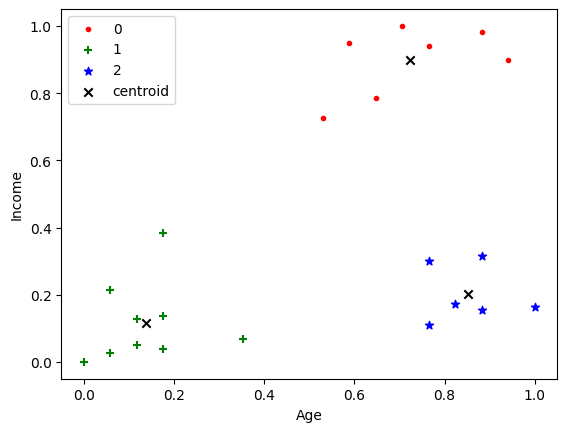

In [42]:
plt.scatter(dfm0['Age'],dfm0['Income($)'],color='red',marker='.',label=0)
plt.scatter(dfm1['Age'],dfm1['Income($)'],color='green',marker='+',label=1)
plt.scatter(dfm2['Age'],dfm2['Income($)'],color='blue',marker='*',label=2)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black',marker='x',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

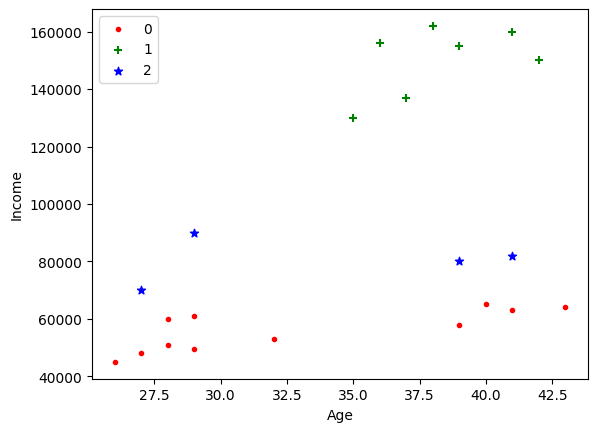

In [38]:
plt.scatter(df0['Age'],df0['Income($)'],color='red',marker='.',label=0)
plt.scatter(df1['Age'],df1['Income($)'],color='green',marker='+',label=1)
plt.scatter(df2['Age'],df2['Income($)'],color='blue',marker='*',label=2)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [34]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

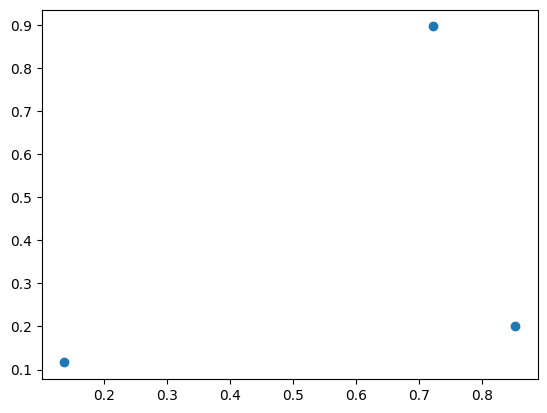

In [36]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [43]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

In [44]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.22407006551788156,
 0.17462386586687897,
 0.13706529523670868,
 0.10188787724979426]

Text(0, 0.5, 'Sum of squared errors')

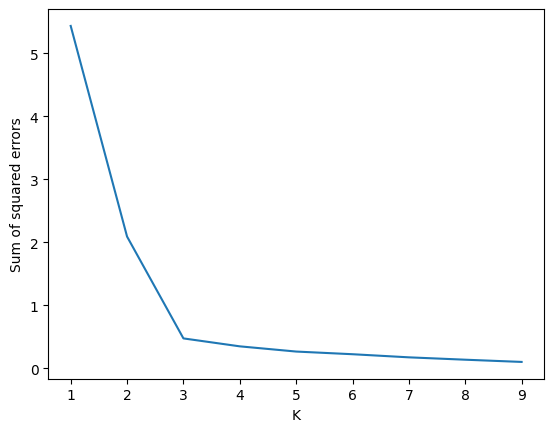

In [47]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared errors')

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()

In [55]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,3.5,1.4,0.2
1,0.166667,3.0,1.4,0.2
2,0.111111,3.2,1.3,0.2
3,0.083333,3.1,1.5,0.2
4,0.194444,3.6,1.4,0.2


In [57]:
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,1.4,0.2
1,0.166667,0.416667,1.4,0.2
2,0.111111,0.500000,1.3,0.2
3,0.083333,0.458333,1.5,0.2
4,0.194444,0.666667,1.4,0.2


In [58]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.2
1,0.166667,0.416667,0.067797,0.2
2,0.111111,0.500000,0.050847,0.2
3,0.083333,0.458333,0.084746,0.2
4,0.194444,0.666667,0.067797,0.2


In [59]:
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [60]:
df['cluster'] = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df.head()

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [62]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

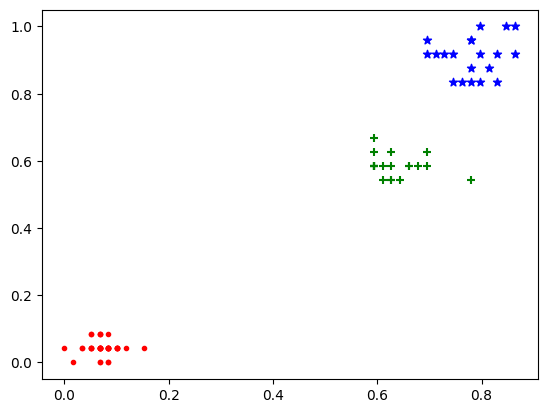

In [63]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker='.', label='0')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', marker='+', label='1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', marker='*', label='2')

In [69]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(k)
    km.fit_predict(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

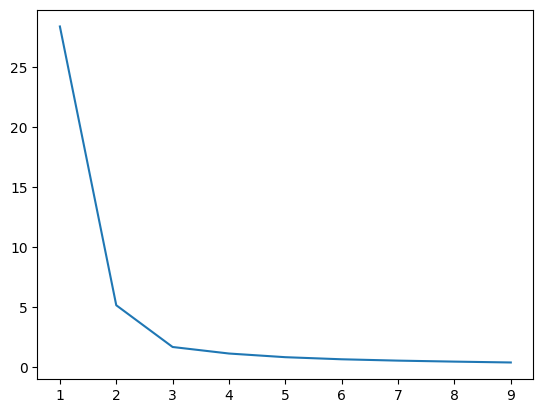

In [71]:
plt.plot(k_rng,sse)

In [67]:
km = KMeans(n_clusters=3)

In [72]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(k)
    km.fit_predict(df[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

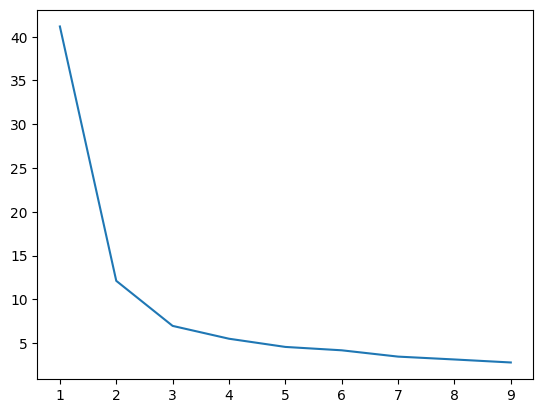

In [73]:
plt.plot(k_rng,sse)

In [75]:
df.drop(['cluster','cluster_4'],axis=1, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [76]:
km = KMeans(n_clusters=3)

In [77]:
df['cluster'] = km.fit_predict(df)
df.head()

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [84]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0


In [88]:
(df['cluster'] == df['target']).sum()

67

In [89]:
len(df)

150